<h1 align = 'center'> Network Analysis </h1>
<h2 align = 'center'> Individual Assignment 1 </h2>

<h3 align = 'center'> Object Images </h2>

<h4 align = 'center' > @ChenYu Wang - , 6774326 </h4>
<h4 align = 'center' > @Lena Walcher - l.t.walcher@students.uu.nl, 6774326 </h4>
<h4 align = 'center' > @Ioannis Konstantakopoulos - , 6774326 </h4>
<h4 align = 'center' > @Hans Franke - h.a.franke@students.uu.nl, 6774326 </h4>


In [5]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator #preprocessing images

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10229439093768555126
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6959755424
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11383059481653327830
physical_device_desc: "device: 0, name: GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


Identifying objects from images with a high variation in object position, size and
viewing angle is a particularly difficult problem, and a major application of artificial
deep learning networks. Here we will build a network to do this.

This network has
more layers and is more computationally-intensive than previous exercises, even
using the low-resolution images we will use here.
The CIFAR-10 dataset contains colour images of objects, each 32x32x3 pixels (for
the three colour channels). These have 10 categories (or classes) of object (airplane,
automobile, bird, cat, deer, dog, frog, horse, ship & truck) with 5,000 images in each,
making a total of 50,000 images in the training set (x_train, y_train), randomly
ordered with numerical labels for each (1=airplane, 2=automobile etc.). The test set
(x_test, y_test) contains 10,000 images ordered by their label.

In [7]:
#Download the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() 

In [8]:
#Save to disk (avoid the need of download one more time.. ~23 min :( ) Uncoment to save again, in case of step above used!
#np.save('x_train', x_train)
#np.save('y_train', y_train)
#np.save('x_test', x_test)
#np.save('y_test', y_test)

In [9]:
#load Files
x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [10]:
#scale the data
x_train = x_train / 255
x_test = x_test / 255


In [11]:
#Categorical Variables
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


## Question 16:
Before fitting the model, show your teacher the code you used to define the model
described here. (Question 16, 6 points)

In [12]:
#Defining model with Dropout Layers
model = keras.Sequential()
#Conv 1
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                              activation="relu", input_shape=(32, 32, 3), padding='same'))
#Conv2
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
                              activation="relu"))
#maxPool
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
#-----------------------#
#ADD NEW LAYERS
#Conv 3
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                              activation="relu", padding='same'))
#Conv 4
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
                              activation="relu"))
#maxPool 2
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))

#-----------------------#
#Flattening 
model.add(keras.layers.Flatten())

#fullDense
model.add(keras.layers.Dense(512, activation="relu")) 
model.add(keras.layers.Dropout(rate=0.5))

#outputlayer
model.add(keras.layers.Dense(10, activation="softmax")) 

#Compile the Model:
model.compile(loss='categorical_crossentropy',
       optimizer=keras.optimizers.RMSprop(lr=0.0001, decay=1e-6), metrics='accuracy')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)         

### Parameters (example to first layer)
#### Kernel (3x3 = 9)
#### Filters (32)
#### Bias (32 because if 1 for each filter)

9 * 32 + 32 = 896

In [13]:
# Fit the model
history = model.fit(x_train, y_train, batch_size=32, 
                    epochs=20, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 91s 52ms/step - loss: 2.0749 - accuracy: 0.2268 - val_loss: 1.6777 - val_accuracy: 0.3967
Epoch 2/20
1563/1563 [==============================] - 80s 51ms/step - loss: 1.6146 - accuracy: 0.4107 - val_loss: 1.4275 - val_accuracy: 0.4826
Epoch 3/20
1563/1563 [==============================] - 82s 53ms/step - loss: 1.4820 - accuracy: 0.4606 - val_loss: 1.3799 - val_accuracy: 0.4987
Epoch 4/20
1563/1563 [==============================] - 83s 53ms/step - loss: 1.3820 - accuracy: 0.5031 - val_loss: 1.2863 - val_accuracy: 0.5380
Epoch 5/20
1563/1563 [==============================] - 83s 53ms/step - loss: 1.3216 - accuracy: 0.5291 - val_loss: 1.2878 - val_accuracy: 0.5521
Epoch 6/20
1563/1563 [==============================] - 86s 55ms/step - loss: 1.2543 - accuracy: 0.5537 - val_loss: 1.1515 - val_accuracy: 0.5940
Epoch 7/20
1563/1563 [==============================] - 85s 54ms/step - loss: 1.2061 - accuracy: 0.5688 - val_loss: 1.1327 -

In [14]:
#Save model to disk
model.save('model_objects')

INFO:tensorflow:Assets written to: model_objects\assets


In [20]:
#load model = > uncoment to run! :)
#model = keras.models.load_model('model_objects')
#model

## Question 17:
Plot the training history and show it to your teacher (Question 17, 2 points)

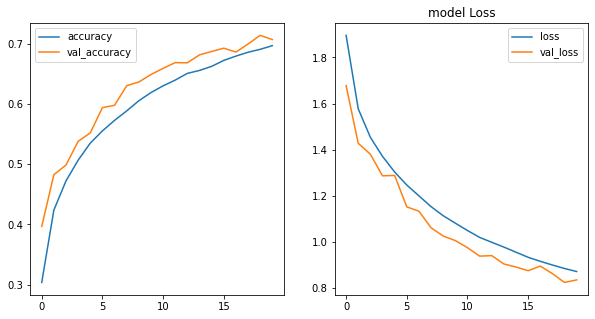

In [15]:
#Accuracy
fig, [ax,ax1] = plt.subplots(figsize=(10,5),nrows=1,ncols=2)
plt.title('model accuracy')
ax.plot(history.history['accuracy'], label = 'accuracy')
ax.plot(history.history['val_accuracy'], label = 'val_accuracy')
ax.legend()
plt.title('model Loss')
ax1.plot(history.history['loss'], label = 'loss')
ax1.plot(history.history['val_loss'], label = 'val_loss')
ax1.legend()

## Question 18:
Discuss with your group, then describe to your teacher, how the training history
differs from the convolutional model for digit recognition and why. (Question 18, 5
points)

The model is more complex, with 2 layers of convolutions (4 if we consider 2 conv x 2 sub conv). It by itself turn the model slower than before. Contribution to this we have now 3D array of image, so basicaly we come from 784 to 3072 (32x32x3) input size, it turns the model slower. 

The model is a lot more complex with added layers and dropouts, with 2 layers of convolutions (4 if we consider 2 conv x 2 sub conv). It by itself turn the model slower than before. Contribution to this we have now 3D array of image, so basicaly we come from 784 to 3072 (32x32x3) input size, it turns the model slower. Epochs before was 6, now we have 20 epochs. 

Another big change is the difference in learning rate as this model uses a learning rate of 0.001 while the previous model used a lr of 1 and therefore made a lot bigger changes. As one can see in the plot above, the accuracy of the model doesn't jump as high after the first epoch but continues to improve due to the smaller learning rate. The test accuracy is higher than the training accuracy but both are still rather low.

## Question 19: 
Discuss with your group, then describe to your teacher, how the time taken for each
training epoch differs from the convolutional model for digit recognition. Give several
factors that may contribute to this difference (Question 19, 4 points)

It took a lot longer for each epoch to run as the model is much more complex and includes more layers.
This might be due to:

- number of layers in the model (from 1 to 2)
- optimizer
- input size (from 784,1) to (32,32,3)
- batch size (from 128 to 32)
- epochs (total time differs not time by epoch)

Model_digit_recognition:
*Adadelta*: Instead of accumulating all previously squared gradients, Adadelta limits the window of accumulated past gradients to some fixed size w. In this exponentially moving average is used rather than the sum of all the gradients.

Model_object_recognition:
*RMSprop*: The centered version additionally maintains a moving average of the gradients, and uses that average to estimate the variance.